In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [76]:
# Load the data
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")
example_sumbit = pd.read_csv("data/gender_submission.csv")

In [21]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


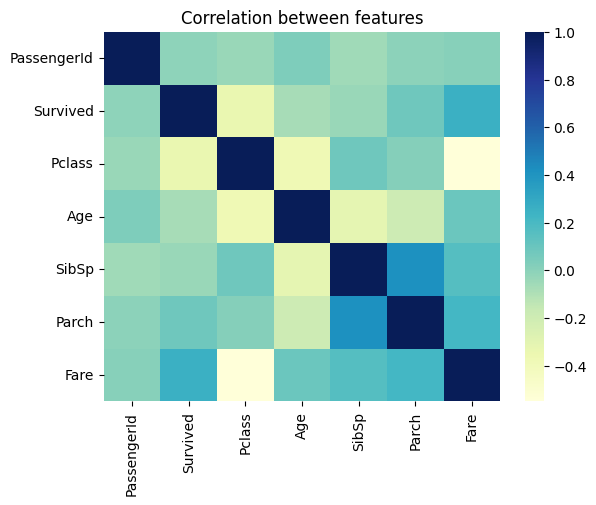

In [23]:
sns.heatmap(train_data.corr(numeric_only=True), cmap='YlGnBu')
plt.title('Correlation between features')
plt.show()

#### Correlation Analysis

The heatmap above shows the correlation between different features in the training dataset. Key observations:

- **Survived** is highly correlated with:
    - **Pclass**
    - **Parch**
    - **Fare**

- **Fare** and **Pclass** are also highly correlated with each other.

- **Age** and **SibSp** have a moderate correlation with **Survived**.

- **PassengerId** is not correlated with **Survived** at all.

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split.split(train_data, train_data[['Survived', 'Sex', 'Pclass']]):
    strat_train_set = train_data.loc[train_index]
    strat_test_set = train_data.loc[test_index]


In [25]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S


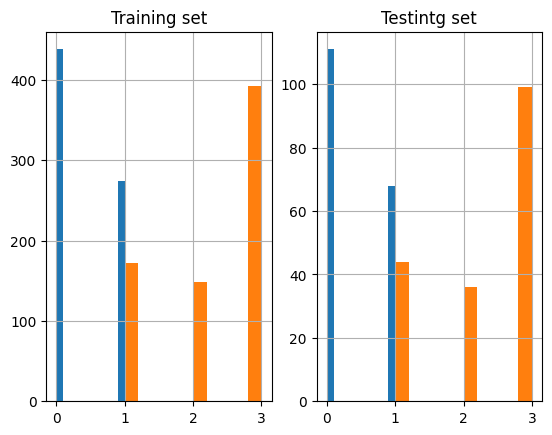

In [26]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.title("Training set") 
plt.subplot(1,2,2)
strat_test_set['Survived'].hist() 
strat_test_set['Pclass'].hist() 
plt.title("Testintg set")

plt.show()

In [27]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 464 to 187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          560 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


#### Handling Missing Values

Missing values (NaN) were found in the **Age** and **Cabin** columns.

- To handle the missing values in the **Age** column, we will use `SimpleImputer` from the `sklearn` library.
- We will drop the **Cabin** column as it does not provide any useful information for the model.

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeEstimator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [36]:
from sklearn.preprocessing import OneHotEncoder

class CategoricalFeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        columns = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[columns[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        columns = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[columns[i]] = matrix.T[i]
        return X


In [37]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Sex", "N", "Cabin", "Ticket","Name"], axis=1, errors="ignore")

In [38]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("AgeEstimator", AgeEstimator()),
                     ("CategoricalFeatureEncoder", CategoricalFeatureEncoder()),
                     ("FeatureDropper", FeatureDropper())])

In [39]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [41]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
464,465,0,3,29.682143,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
519,520,0,3,32.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
485,486,0,3,29.682143,3,1,25.4667,0.0,0.0,1.0,1.0,0.0
60,61,0,3,22.000000,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
145,146,0,2,19.000000,1,1,36.7500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
703,704,0,3,25.000000,0,0,7.7417,0.0,1.0,0.0,0.0,1.0
608,609,1,2,22.000000,1,2,41.5792,1.0,0.0,0.0,1.0,0.0
115,116,0,3,21.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
346,347,1,2,40.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0


In [42]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 464 to 187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [46]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis = 1)
y = strat_train_set['Survived']
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
y_train = y.to_numpy()


(array([[ 0.06320777,  0.82789342,  0.        , ...,  0.61197825,
         -0.73561236,  0.73561236],
        [ 0.27585521,  0.82789342,  0.18255676, ...,  0.61197825,
         -0.73561236,  0.73561236],
        [ 0.14440043,  0.82789342,  0.        , ...,  0.61197825,
          1.35941164, -1.35941164],
        ...,
        [-1.28613691,  0.82789342, -0.68381429, ...,  0.61197825,
         -0.73561236,  0.73561236],
        [-0.39301765, -0.37019624,  0.81264479, ...,  0.61197825,
          1.35941164, -1.35941164],
        [-1.00776208, -1.56828591,  1.20644981, ...,  0.61197825,
         -0.73561236,  0.73561236]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
   

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rfc = RandomForestClassifier()

params_grid = [{
    "n_estimators": [10, 100, 200, 500, 1000],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2,3,4]
}]

grid_search = GridSearchCV(estimator=rfc, param_grid=params_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 15, 20],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [66]:
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

In [70]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [ ]:
X_test_pre = strat_test_set.drop(['Survived'], axis=1)
y_test_pre = strat_test_set['Survived']

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test_pre)
y_test = y_test_pre.to_numpy()



(array([[-0.57915833,  0.82534717, -0.54971054, ..., -1.54186851,
          1.34047566, -1.34047566],
        [ 0.90205979,  0.82534717,  0.72525254, ..., -1.54186851,
         -0.74600385,  0.74600385],
        [-0.3641428 , -0.3660814 , -0.3372167 , ...,  0.64856374,
         -0.74600385,  0.74600385],
        ...,
        [-0.21283557,  0.82534717, -2.03716747, ..., -1.54186851,
          1.34047566, -1.34047566],
        [ 1.36394501,  0.82534717, -1.75384234, ...,  0.64856374,
          1.34047566, -1.34047566],
        [-0.75833794,  0.82534717,  0.01693972, ..., -1.54186851,
         -0.74600385,  0.74600385]]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
   

In [73]:
best_estimator.score(X_test, y_test)

0.8212290502793296


### Model Evaluation and Next Steps

We achieved a score of 0.82(82%) on our self-created training set from `train.csv`, which is a good result. This confirms that our approach is correct. Now, we can train the model on the entire `train.csv` dataset and use the test set provided in the assignment to have more data for training.


In [ ]:
train_data = pipeline.fit_transform(train_data)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_train_final = train_data.drop(['Survived'], axis = 1)
y_train_final = train_data['Survived']


(   PassengerId  Pclass   Age  SibSp  Parch     Fare    C    S    Q  Female  \
 0            1       3  22.0      1      0   7.2500  0.0  0.0  1.0     0.0   
 1            2       1  38.0      1      0  71.2833  1.0  0.0  0.0     1.0   
 2            3       3  26.0      0      0   7.9250  0.0  0.0  1.0     1.0   
 3            4       1  35.0      1      0  53.1000  0.0  0.0  1.0     1.0   
 4            5       3  35.0      0      0   8.0500  0.0  0.0  1.0     0.0   
 
    Male  
 0   1.0  
 1   0.0  
 2   0.0  
 3   0.0  
 4   1.0  ,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64,
 (891, 11),
 (891,))

In [82]:
scaler = StandardScaler()

X_final_scaled = scaler.fit_transform(X_train_final)
y_train = y_train_final.to_numpy()

In [84]:
clf_final = RandomForestClassifier()

params_grid_final = [{
    "n_estimators": [10, 100, 200, 500, 1000],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2,3,4]
}]

grid_search_final = GridSearchCV(clf_final, params_grid_final, cv = 3, scoring="accuracy", return_train_score=True)
grid_search_final.fit(X_final_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 15, 20],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf_whole = grid_search_final.best_estimator_


RandomForestClassifier(max_depth=10, n_estimators=500)

In [88]:
test_data = pipeline.fit_transform(test_data)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [ ]:
X_subm_data = test_data.fillna(method="ffill")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


C:\Users\Volodymyr\AppData\Local\Temp\ipykernel_10012\1422628334.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_subm_data = test_data.fillna(method="ffill")


In [92]:
X_subm_data_scaled = scaler.transform(X_subm_data)
predictions = final_clf_whole.predict(X_subm_data_scaled)

In [ ]:
submission_df = pd.DataFrame({
    "PassengerId":test_data['PassengerId'],
    "Survived":predictions
})


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
submission_df.to_csv("data/submission.csv", index=False)